Enter country name (e.g. India): Brazil
Enter prediction year (e.g. 2030): 2028


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


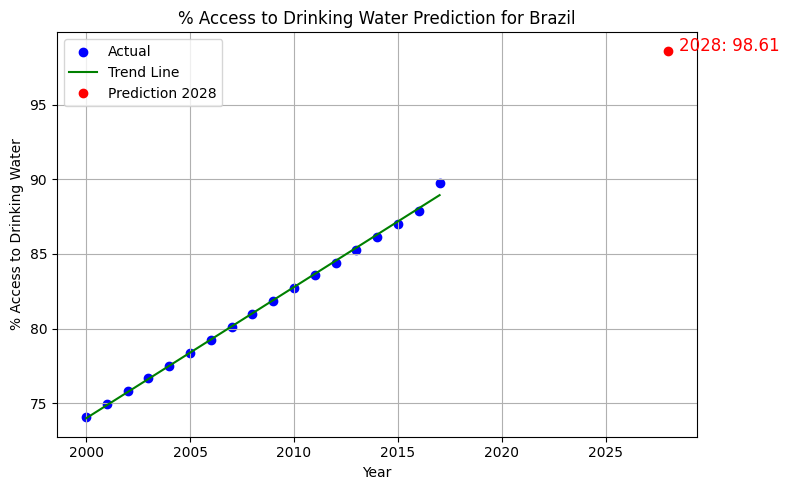

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


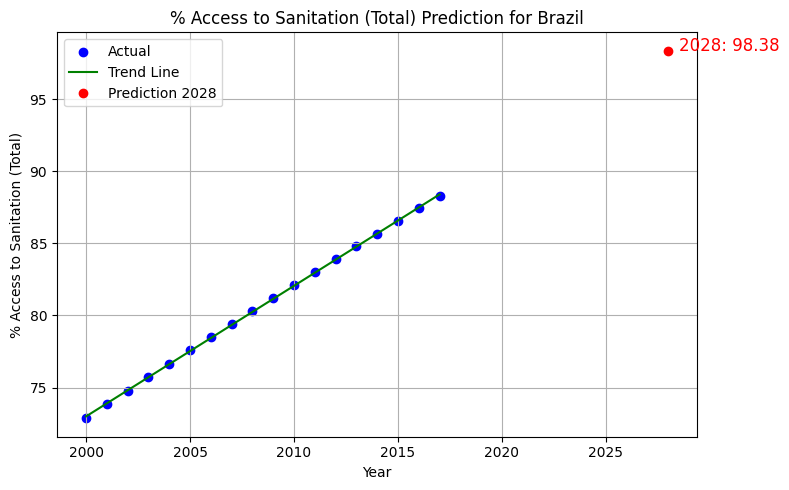

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


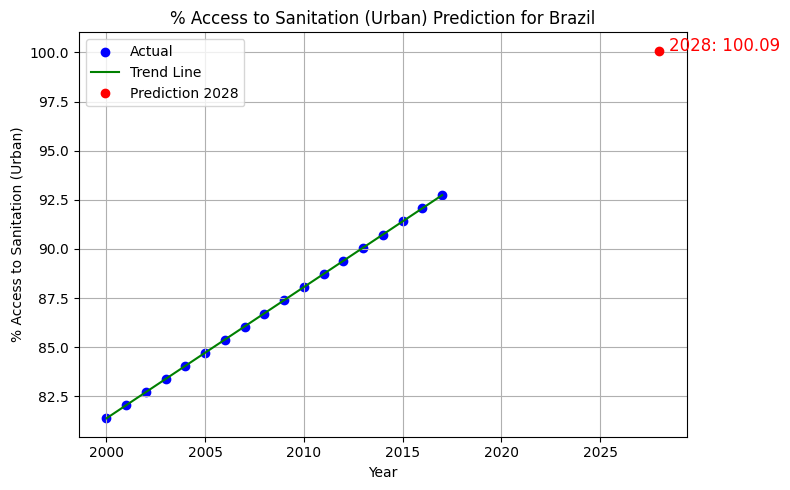

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


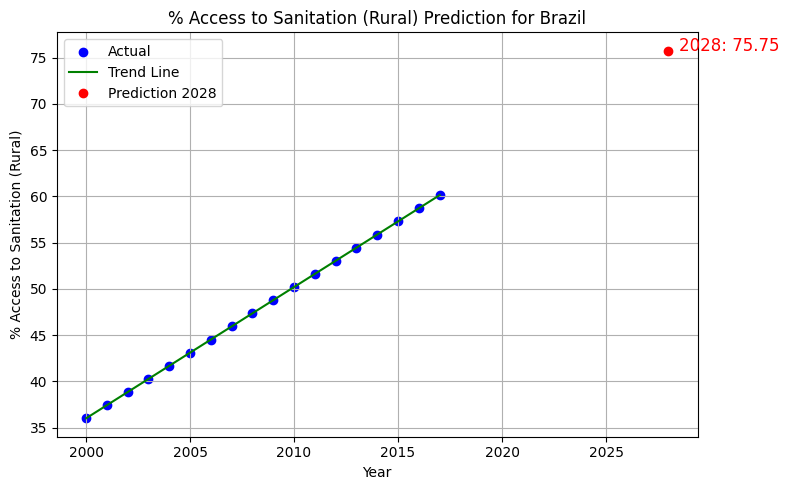

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


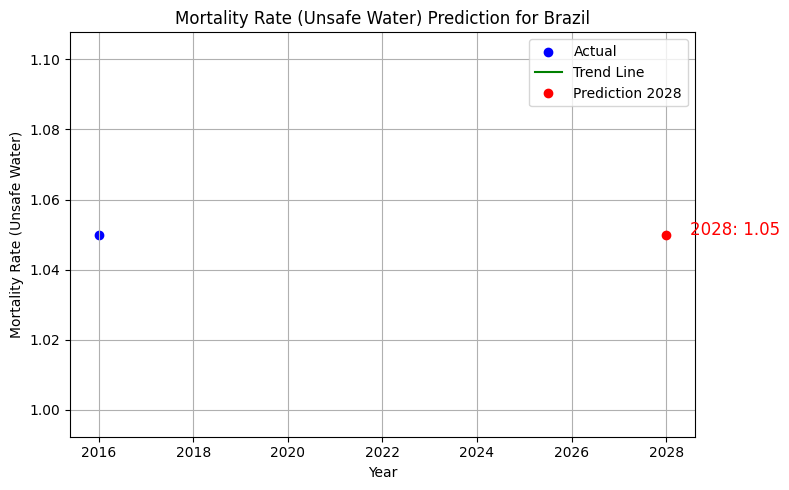


🔮 Predictions Summary for Brazil in 2028
💧 Drinking Water Access: 98.61%
🚽 Sanitation Access (Total): 98.38%
🚽 Sanitation Access (Urban): 100%
🚽 Sanitation Access (Rural): 75.75%
☠️ Mortality Rate (Unsafe Water): 1.05 per 100,000


In [9]:
# 🔁 Step 1: Upload the 3 required files
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df_drinking = pd.read_csv('basicDrinkingWaterServices.csv')
df_sanitation = pd.read_csv('atLeastBasicSanitizationServices.csv')
df_mortality = pd.read_csv('mortalityRateUnsafeWash.csv')

# 🔢 Step 2: Get User Input for Country and Year
country = input("Enter country name (e.g. India): ").strip()
predict_year = int(input("Enter prediction year (e.g. 2030): "))

# 🔧 Step 3: Define Prediction + Chart Function
def train_and_predict(df, year_col, value_col, predict_year, label):
    X = df[[year_col]]
    y = df[value_col]

    model = LinearRegression()
    model.fit(X, y)
    future_pred = model.predict([[predict_year]])[0]

    # 📊 Plot with Prediction Label
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, model.predict(X), color='green', label='Trend Line')
    plt.plot([predict_year], [future_pred], 'ro', label=f'Prediction {predict_year}')
    plt.text(predict_year + 0.5, future_pred, f"{predict_year}: {round(future_pred, 2)}", color='red', fontsize=12)

    plt.xlabel('Year')
    plt.ylabel(label)
    plt.title(f"{label} Prediction for {country}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return future_pred

# 📈 Step 4: Predict Drinking Water Access
df_country_drink = df_drinking[df_drinking['Location'] == country][['Period', 'First Tooltip']]
df_country_drink = df_country_drink.rename(columns={'Period': 'Year', 'First Tooltip': 'Access'})

if not df_country_drink.empty:
    pred_drink = train_and_predict(df_country_drink, 'Year', 'Access', predict_year, '% Access to Drinking Water')
else:
    pred_drink = None
    print(f"❌ No drinking water data for {country}")

# 🚽 Step 5: Predict Sanitation (Total, Urban, Rural)
df_san_country = df_sanitation[df_sanitation['Location'] == country][['Period', 'Dim1', 'First Tooltip']]
df_san_country = df_san_country.rename(columns={'Period': 'Year', 'First Tooltip': 'Access'})

sanitation_preds = {}
for group in ['Total', 'Urban', 'Rural']:
    df_group = df_san_country[df_san_country['Dim1'] == group][['Year', 'Access']]
    if not df_group.empty:
        pred = train_and_predict(df_group, 'Year', 'Access', predict_year, f'% Access to Sanitation ({group})')
        sanitation_preds[group] = pred
    else:
        print(f"❌ No sanitation data for {group} in {country}")

# ☠️ Step 6: Predict Mortality from Unsafe Water
df_mortality_country = df_mortality[df_mortality['Location'] == country]
df_mortality_both = df_mortality_country[df_mortality_country['Dim1'] == 'Both sexes'][['Period', 'First Tooltip']]
df_mortality_both = df_mortality_both.rename(columns={'Period': 'Year', 'First Tooltip': 'MortalityRate'})

if not df_mortality_both.empty:
    pred_mortality = train_and_predict(df_mortality_both, 'Year', 'MortalityRate', predict_year, 'Mortality Rate (Unsafe Water)')
else:
    pred_mortality = None
    print(f"❌ No mortality data for {country}")

# ✅ Step 7: Final Summary
print(f"\n🔮 Predictions Summary for {country} in {predict_year}")

if pred_drink is not None:
    print(f"💧 Drinking Water Access: {round(min(pred_drink, 100), 2)}%")
for group, value in sanitation_preds.items():
    print(f"🚽 Sanitation Access ({group}): {round(min(value, 100), 2)}%")
if pred_mortality is not None:
    print(f"☠️ Mortality Rate (Unsafe Water): {round(pred_mortality, 2)} per 100,000")

